# Heart disease prediction

## here we are using all the features

In [322]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
dataset= pd.read_csv("/Users/nikhil/Documents/heart disease prediction GDSC challenge/heart_failure_clinical_records_dataset.csv")
dataset.head

<bound method NDFrame.head of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_cr

In [324]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [325]:
dataset.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [326]:
df=pd.DataFrame(dataset)

In [327]:
len=df.shape
len

(299, 13)

In [328]:
len=len[1]

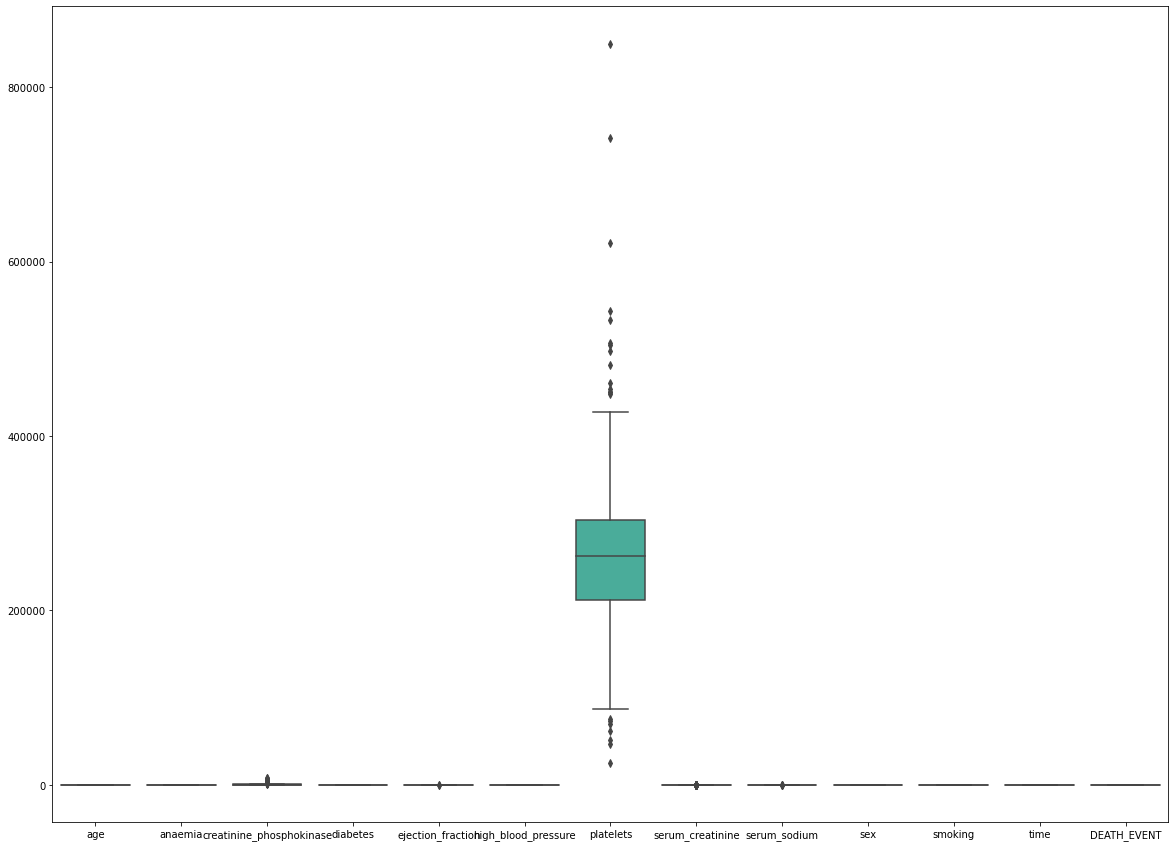

In [329]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.show()

In [330]:
x=df.iloc[:,0]
x

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

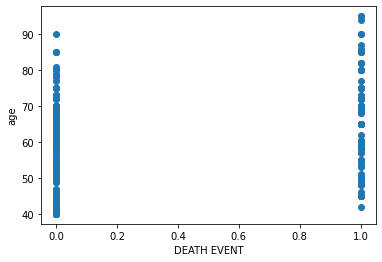

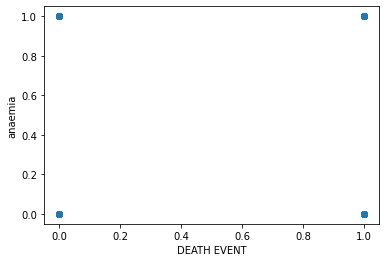

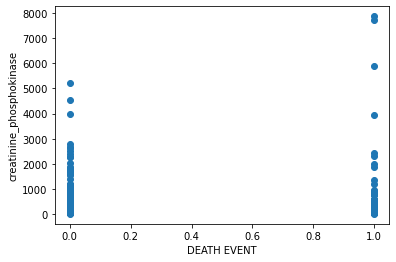

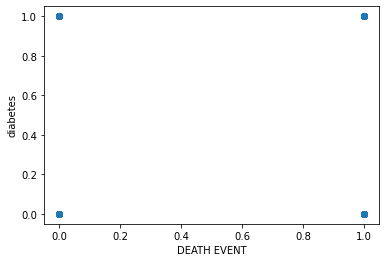

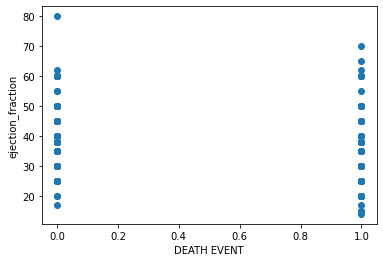

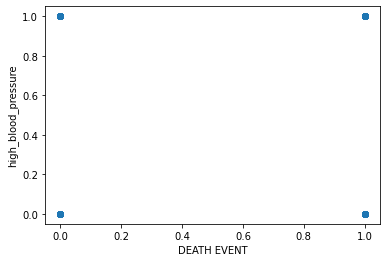

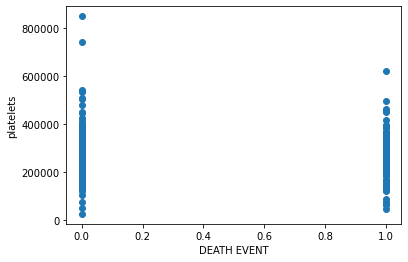

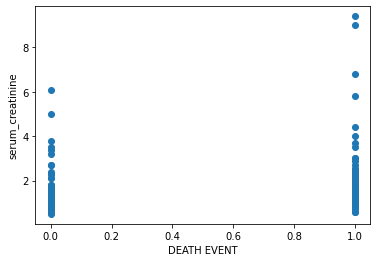

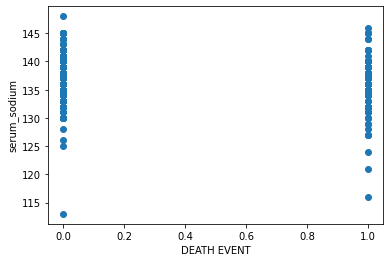

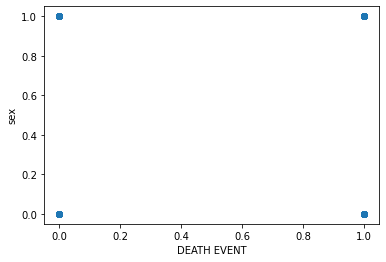

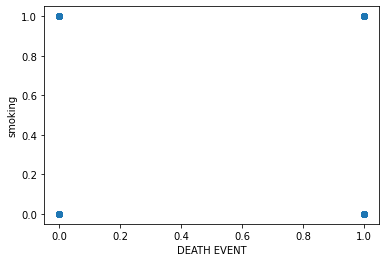

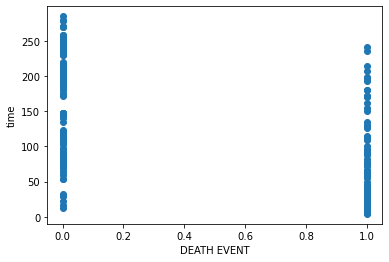

In [358]:
for i in range (0, len-1):
      x=df.iloc[:,i]
      plt.scatter(df['DEATH_EVENT'],x,)
      col=dataset.columns[i]
      plt.xlabel("DEATH EVENT")
      plt.ylabel(col)
      plt.show()

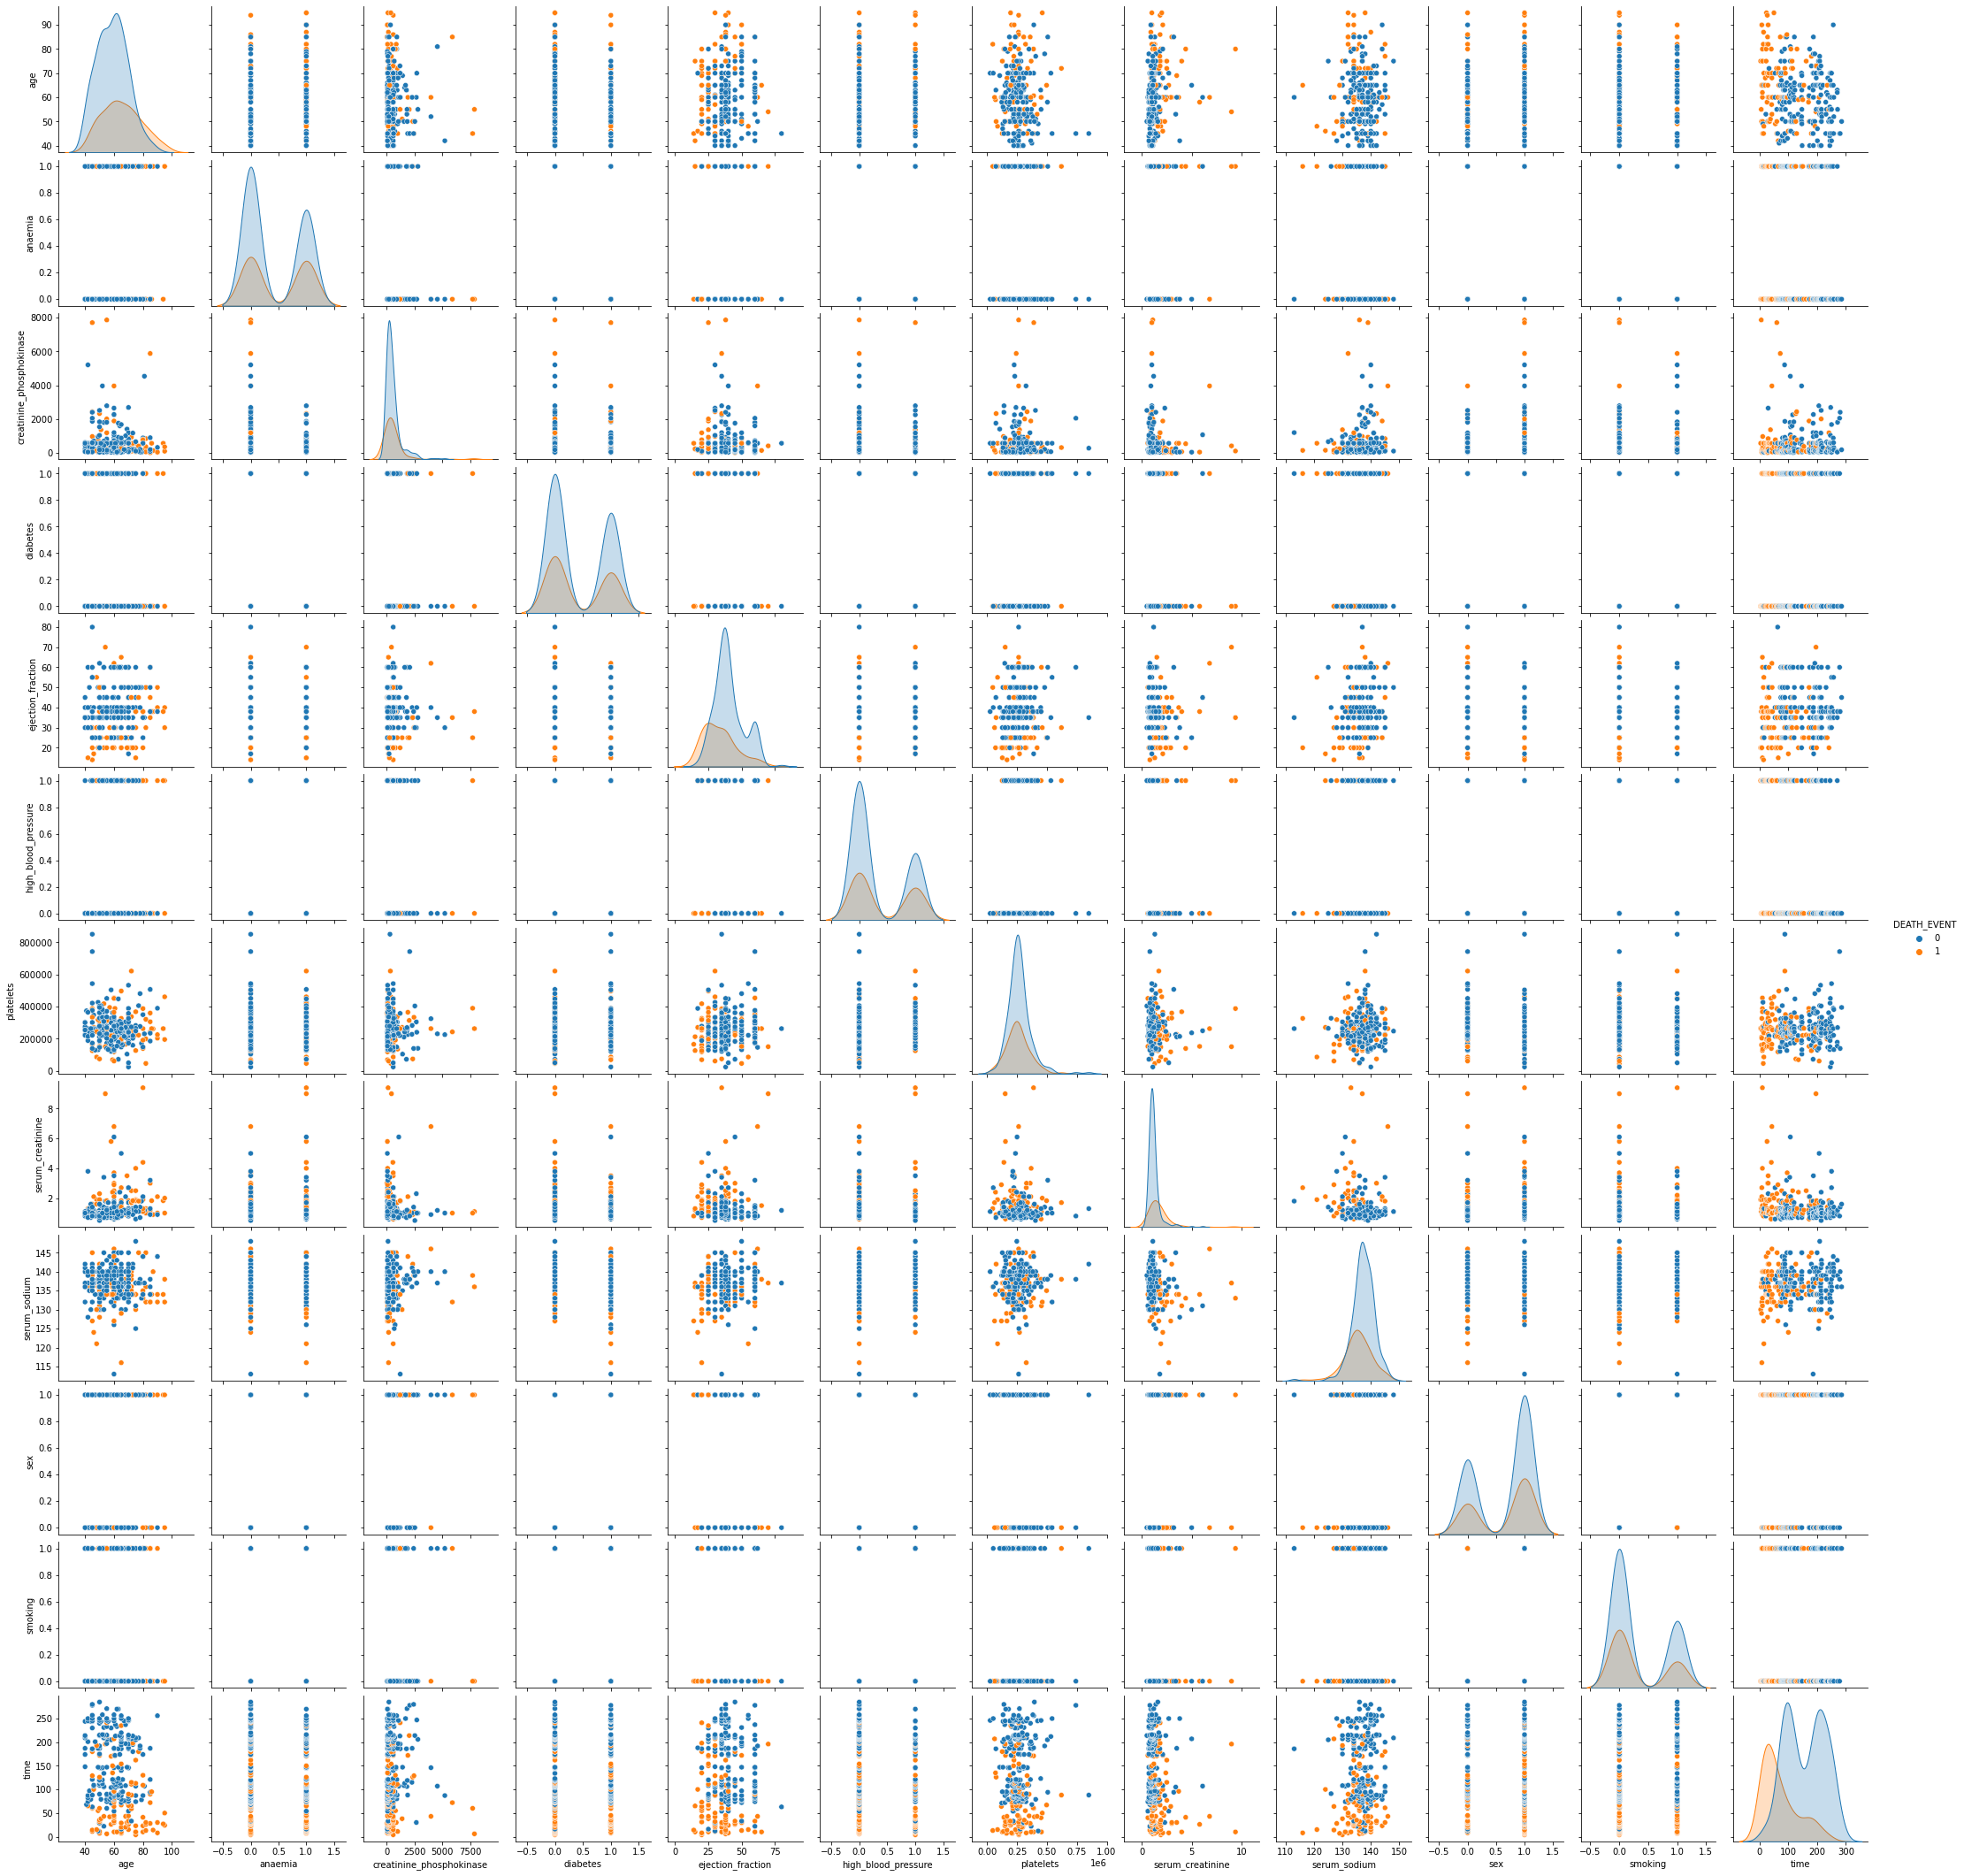

In [359]:
sns.pairplot(data=df, hue='DEATH_EVENT')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

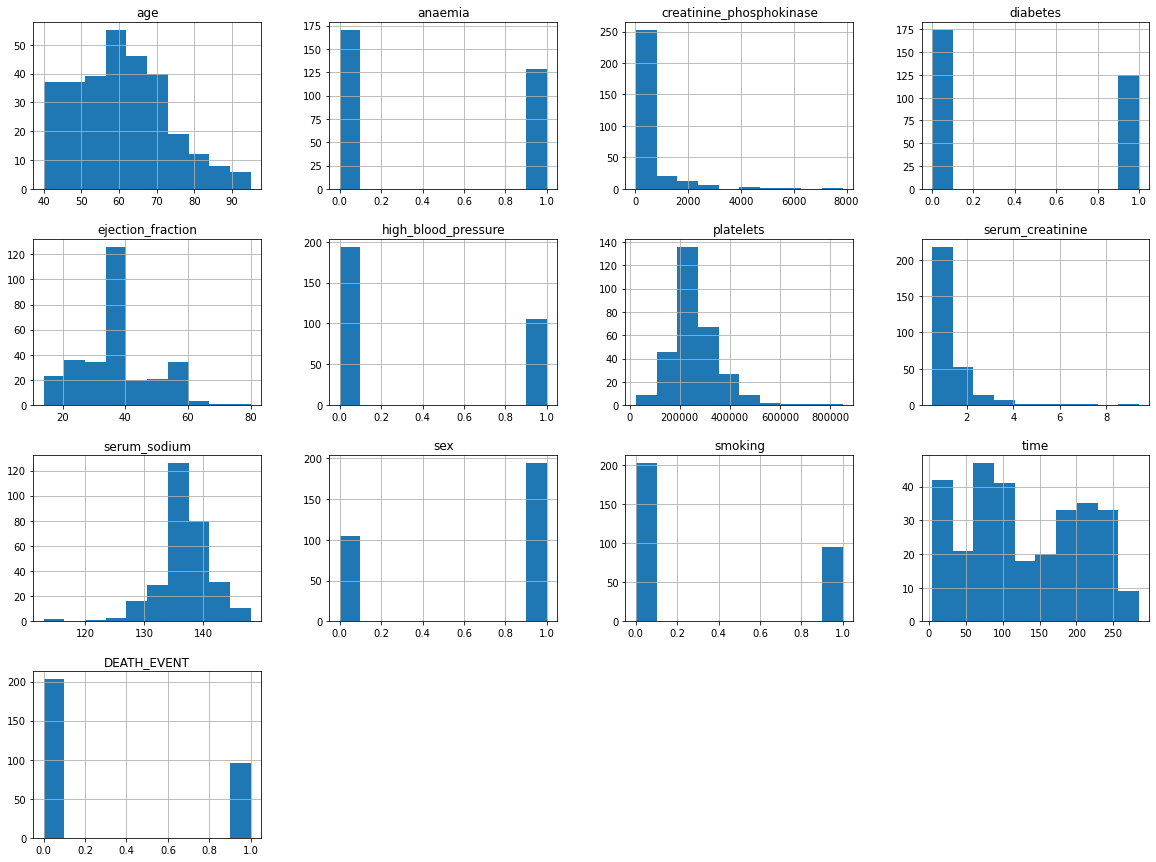

In [360]:
df.hist(figsize=(20,15),)

#### so we found no null values, 
#### so lets go to features we will be using for prediction

In [361]:


features=["age" , "anaemia", "creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","time","smoking",]
X=df[features]
Y=df["DEATH_EVENT"]

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [362]:
f=[]  # to find best hyperparameters
for j in range(1,100):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=j)
      scaler = StandardScaler()
      Scaled_X_train=scaler.fit_transform(X_train)
      Scaled_X_test=scaler.transform(X_test)

      # KNN

      from sklearn.neighbors import KNeighborsClassifier
      from sklearn.metrics import accuracy_score
      k=0.0 # to find best hyperparameters
      m=0 # to find best hyperparameters
      for i in range(1,19):
            KNN=KNeighborsClassifier(n_neighbors=i)
            KNN.fit(Scaled_X_train, y_train)
            pred= KNN.predict(Scaled_X_test)
            score=accuracy_score(y_test,pred)
            if(score>k):
                  k=score
                  m=i
      f.append(k)
      # print(k*100,"% ")
      # print ("n_neighbors= {:1}".format(i))
print(max(f))

0.8888888888888888


so KNN is giving 88.89% accuracy


---
# SVM 

In [337]:
from sklearn.svm import SVC

In [338]:
find_best=[]  # to find best hyperparameters
for j in range(1,100):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=j)
      scaler = StandardScaler()
      Scaled_X_train=scaler.fit_transform(X_train)
      Scaled_X_test=scaler.transform(X_test)

      # SVC

      from sklearn.metrics import accuracy_score
      k=0.0 # to find best hyperparameters
      
      for i in range(1,100):

            SV=SVC(C=i, gamma=0.01)
            SV.fit(Scaled_X_train, y_train)
            pred= SV.predict(Scaled_X_test)
            score=accuracy_score(y_test,pred)
            if(score>k):
                  k=score
      find_best.append(k)
print(max(find_best))


so SVM is giving 93.33% accuracy

---
# LOGISTIC REGRESSION

In [339]:
from sklearn.linear_model import LogisticRegression

In [340]:
find_best_LR=[]  # to find best hyperparameters
for j in range(1,100):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=j)
      scaler = StandardScaler()
      Scaled_X_train=scaler.fit_transform(X_train)
      Scaled_X_test=scaler.transform(X_test)

      # LOGISTIC REGRESSION
      k=0.0  # to find best hyperparameters

      from sklearn.metrics import accuracy_score
      for i in range(1,20):
            LR=LogisticRegression(penalty='l1',C=i, solver='liblinear')
            LR.fit(Scaled_X_train, y_train)
            pred= LR.predict(Scaled_X_test)
            score=accuracy_score(y_test,pred)
            if(score>k):
                  k=score
      find_best_LR.append(k)
print(max(find_best_LR))

0.9


In [ ]:
print(find_best_LR.index(max(find_best_LR)))

so LOGISTIC REGRESSION is giving 90% accuracy

---
# Random Forest

In [342]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
find_best_RF=[] # to find best hyperparameters
for j in range(1,100):
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=j)
      scaler = StandardScaler()
      Scaled_X_train=scaler.fit_transform(X_train)
      Scaled_X_test=scaler.transform(X_test)

      # RANDOM FOREST
      k=0.0

      from sklearn.metrics import accuracy_score
      for i in range(1,200):
            RFC=RandomForestClassifier(n_estimators=i,criterion="entropy")
            RFC.fit(Scaled_X_train, y_train)
            pred= RFC.predict(Scaled_X_test)
            score=accuracy_score(y_test,pred)
            if(score>k):
                  k=score
      find_best_RF.append(k)
print(max(find_best_RF))

0.9555555555555556


In [345]:
print(find_best_RF.index(max(find_best_RF)))

84


so Random Forest Classifier is giving 95.56% accuracy

---
### comparing each algorithm, then we will see which one is best fit 

In [346]:
accuracy_list=[max(f)*100,max(find_best)*100,max(find_best_LR)*100,max(find_best_RF)*100]
accuracy_list

[88.88888888888889, 93.33333333333333, 90.0, 95.55555555555556]

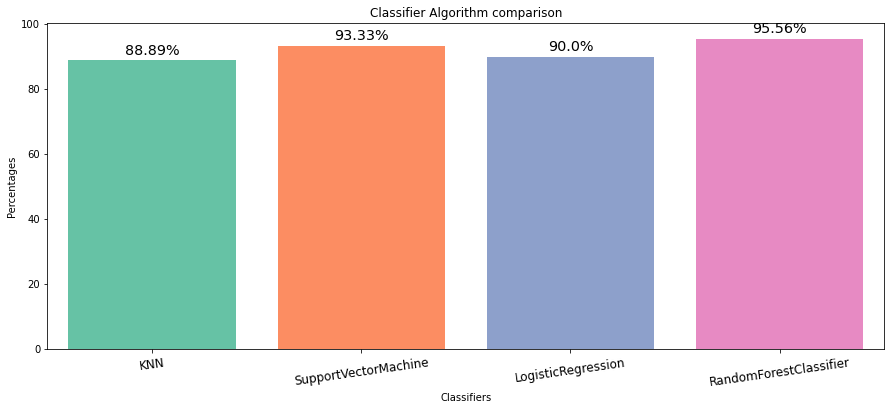

In [357]:
#Comparison

models=['KNN','SupportVectorMachine','LogisticRegression','RandomForestClassifier']
plt.figure(figsize=(15,6))
ax=sns.barplot(x=models, y=accuracy_list, palette = "Set2", saturation =1)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.xlabel("Classifiers")
plt.ylabel("Percentages")
plt.title("Classifier Algorithm comparison")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
plt.show()

### Perfect we got our best fit model
## RANDOM FOREST CLASSIFIER which is giving 95.56% accuracy

- yess, its not a less accuracy, because we are using all features given in this data set to predict if person will die or not. 
- It's te best fit model, even I can see on Kaggle too.

- In Kaggle people have used specific features but in this case all features of Dataset are being used to predict

In [363]:
# now If we have to predict anything we can simply  take input of all values and get the predictions